# **Search Demand Curve for an Enterprise Search service.**


* [Introduction](#Introduction)
* [Loading the ES and WS datasets](#Loading)
* [Top 10 Queries](#Top10)
* [To Question or Not to Question?](#Question)
* [Average Terms per Query](#Average)
* [Basic Search Demand Curve](#Basic)
* [Search Demand Curve Comparison: Enterprise Search v. Web Search](#Comparison)
* [Fat Head, Chunky Middle and Long Tail](#Zones)
* [Verification](#Verification)
* [References](#References)


# **Introduction**  <a class="anchor"  id="Introduction"></a>
A search demand curve is a graphical representation that illustrates the volume of search queries related to a keyword or set of query terms over time.
Enterprise Search (ES) can be simply defined as finding the information needed from within an organisation.   As illustrated below, ES is a federated store of workplace information with data gathered from multiple sources, such as intranets, document management systems,
e-mail and social media and may also include the organisation’s external-facing HTTP web servers(Kraswell et al, 2005).

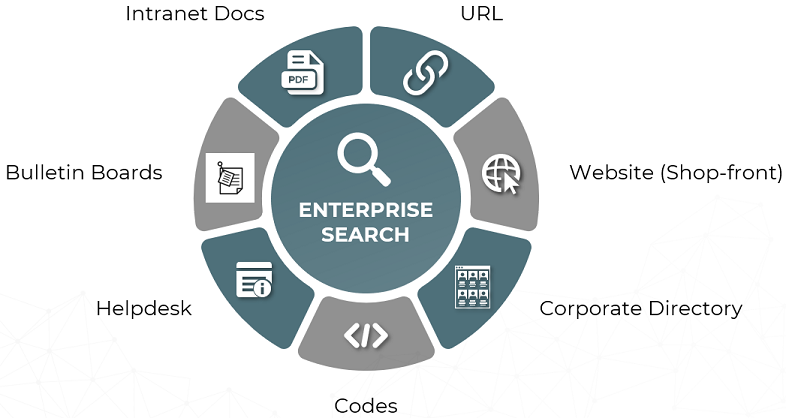

A common misconception that “long-tail” keywords represent the number of words used in the phrase.
In fact, it is not the length of a search term that makes it a long-tail.  It’s the search volume of that search term.   Typically phrases that have lower search volume tend to have more words. As a result, this definition became skewed over time, and people began correlating long-tail with the number of words used in the phrase rather than the search volume.


# **Loading the ES and WS datasets**  <a class="anchor"  id="Loading"></a>

In this script, we use an Enterprise Search (ES) query history dataset generated from a large 3rd level education organisation that serves about 7k queries per day.   The Web Search (WS) dataset is extracted from the month of March, 2006 from the publically avaiable AOL dataset.

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [25]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/es-query-history/ws-query-history-v25.txt
/kaggle/input/es-query-history/es-query-history-v25.txt


In [26]:
# import the ES two-column query history 
query_history_file="/kaggle/input/es-query-history/es-query-history-v25.txt"
column_names = ['queries', 'volume']
es_df = pd.read_csv(
    query_history_file,
    sep ="\t",
    names=column_names,
    header=None
)

# add a counter column
initial_value = 1
es_df['counter'] = range(initial_value, len(es_df) +initial_value)

In [27]:
# import the WS two-column query history 
query_history_file="/kaggle/input/es-query-history/ws-query-history-v25.txt"
column_names = ['queries', 'volume']
ws_df = pd.read_csv(
    query_history_file,
    sep ="\t",
    names=column_names,
    header=None
)

# add a counter column
initial_value = 1
ws_df['counter'] = range(initial_value, len(ws_df) +initial_value)

In [28]:
# Truncate to use just top 500 queries 
# Without this truncation, the long tail will be excessively right-skewed
#es_df = es_df.head(500)

# **Top 10 Queries**  <a class="anchor"  id="Top10"></a>

In [29]:
from IPython.display import display_html 

es_df_top10=es_df.head(10)
ws_df_top10=ws_df.head(10)

es_df_styler = es_df_top10.style.set_table_attributes("style='display:inline'").set_caption('<b>ES Top 10 Query Terms</b>')
ws_df_styler = ws_df_top10.style.set_table_attributes("style='display:inline'").set_caption('<b>WS (AOL) Top 10 Query Terms</b>')

#display_html(es_df_styler._repr_html_()+ws_df_styler._repr_html_(), raw=True)
display_html(ws_df_styler._repr_html_()+es_df_styler._repr_html_(), raw=True)

,queries,volume,counter
0,google,66977,1
1,ebay,32543,2
2,yahoo,26981,3
3,mapquest,25021,4
4,yahoo.com,22856,5
5,google.com,19218,6
6,myspace.com,16039,7
7,internet,13092,8
8,myspace,11260,9
9,www.google.com,10368,10


The AOL dataset covers the period of March, 2006.  It seems quite dated.  MapQuest was the first online route-finding service, launched in 1996, and acquired by AOL.  Google's subsequent launch of Google Maps in 2005 marked the beginning of MapQuest's decline.  Similarly, MySpace was the worlds most popular social networking site, but Facebook overtook is by 2009.

# **To Question, or Not to Question?**  <a class="anchor"  id="Question"></a>

[14.1% of google searches are in the form of a question](https://backlinko.com/google-keyword-study).   Let's see what the equivant score for Enterprise Seach is.

In [30]:
print ("The total number of historical queries in the form of a question is: ",es_df.shape[0])  # count the total number of queries in the form of a question
print ("The number of detected queries  in the form of a question is:")
!egrep -e who -e what -e where -e when -e how -e whose -e ^is -e ^are -e $?  /kaggle/input/es-query-history/es-query-history-v25.txt  | wc -l

The total number of historical queries in the form of a question is:  62044
The number of detected queries  in the form of a question is:
3277


5%  (i.e. 62044/3277) of queries in our Enterprise Search dataset are in form of a question.

In [31]:
print ("The total number of historical queries in the form of a question is: ",ws_df.shape[0])  # count the total number of queries in the form of a question
print ("The number of detected queries  in the form of a question is:")
!egrep -e who -e what -e where -e when -e how -e whose -e ^is -e ^are -e $?  /kaggle/input/es-query-history/ws-query-history-v25.txt  | wc -l

The total number of historical queries in the form of a question is:  4316675
The number of detected queries  in the form of a question is:
289686


6.7% of queries in the AOL Search dataset are in form of a question.

# **Average Terms per Query**  <a class="anchor"  id="Average"></a>

In [32]:
es_df['queries'] = es_df['queries'].astype(str)
es_df['word_count'] = [*map(len, map(str.split, es_df['queries'].tolist()))]
es_mean = es_df.loc[:, 'word_count'].mean()
print ("For Enterprise Search, the average number of Terms per Query is", "%.2f" %es_mean)


For Enterprise Search, the average number of Terms per Query is 2.19


In [33]:
ws_df['queries'] = ws_df['queries'].astype(str)
ws_df['word_count'] = [*map(len, map(str.split, ws_df['queries'].tolist()))]
ws_mean = ws_df.loc[:, 'word_count'].mean()
print ("For Web Search, the average number of Terms per Query is", "%.2f" %ws_mean)


For Web Search, the average number of Terms per Query is 2.89


**We have computed that the number of average terms per query is greater for WS than ES.   This agrees with the findings of Kruschwitz et al who states that "queries submitted on intranets and to site search engines on ...are shorter" than WS ~\cite{Kruschwitz2017}.**

# **Basic Search Demand Curve**   <a class="anchor"  id="Basic"></a>

**Firstly, let's see the basic outline shape using a Seaborn plot: -**

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(15,8)})

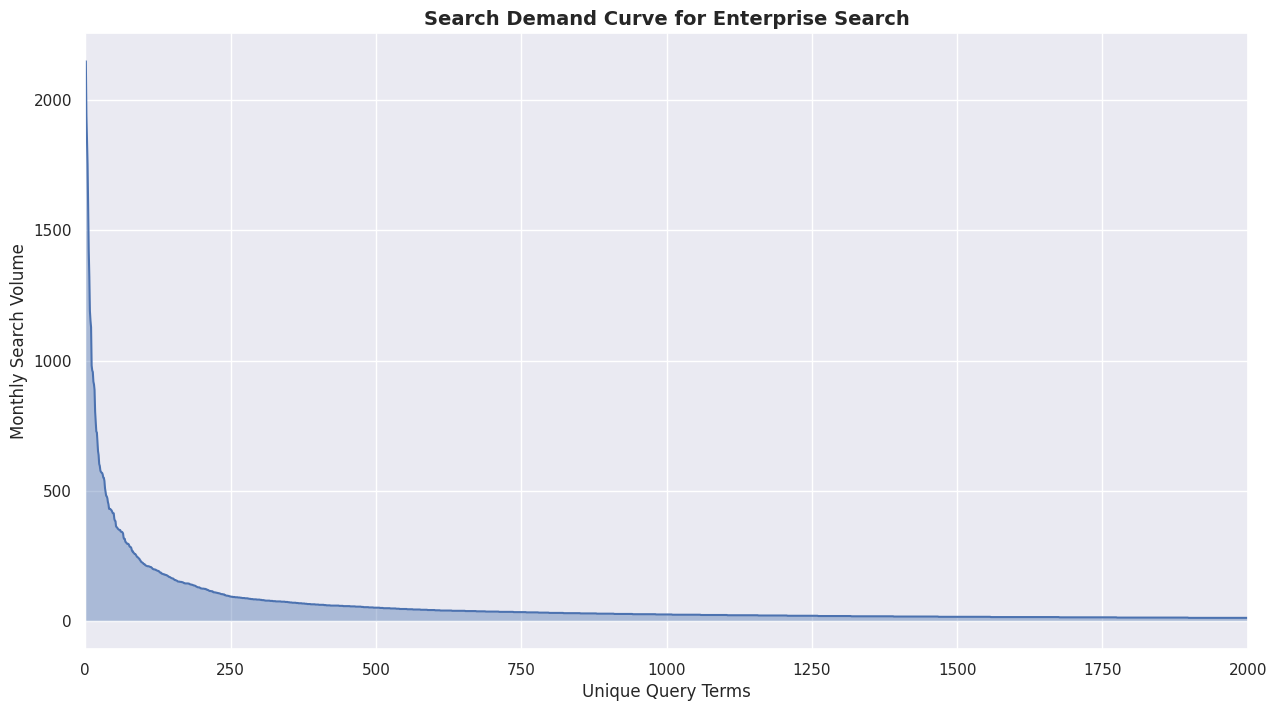

In [35]:
ax = sns.lineplot(y='volume', x='counter', data=es_df) 

ax.set(xlabel=None)  
ax.set_xlim(left=0.0,right=2000)
ax.set_xlabel("Unique Query Terms")
ax.set_ylabel("Monthly Search Volume")
#ax.text(0.5, 0.6, 'Basic Search Demand Curve for ES', transform=fig.transFigure, fontsize=14, ha='center', va='center')
ax.set_title("Search Demand Curve for Enterprise Search",fontsize=14, weight='bold')
#sns.set(rc = {'figure.figsize':(10, 4)})

plt.fill_between(es_df.counter.values, es_df.volume.values,alpha=0.4)
plt.show()

# **Search Demand Curve Comparison: Enterprise Search v. Web Search**   <a class="anchor"  id="Comparison"></a>

/tmp/ipykernel_42/2459244305.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


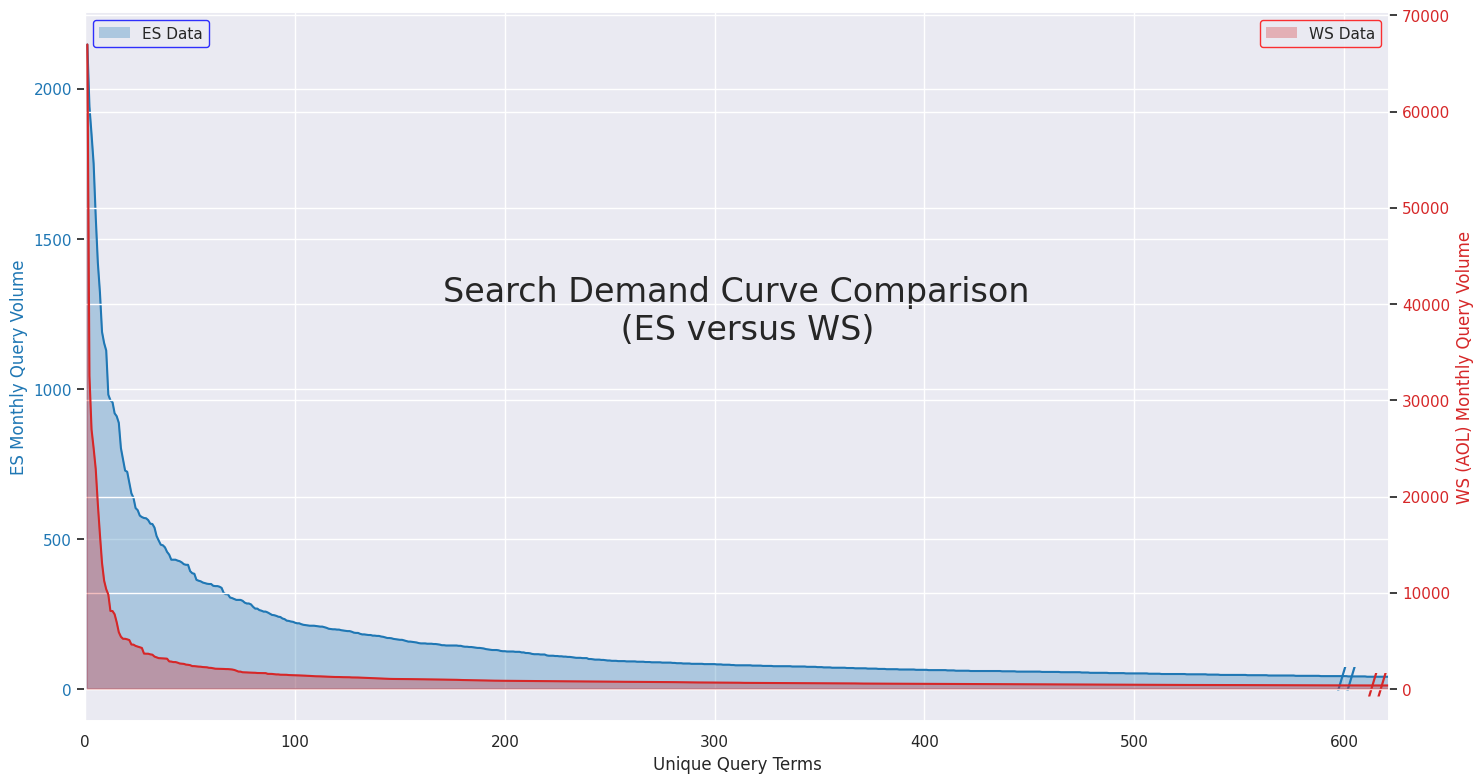

In [36]:
plt.style.use('seaborn-pastel')
fig, ax1 = plt.subplots()

from matplotlib.patches import Patch
def create_legend_proxy(color, edgecolor='black', alpha=0.3, linewidth=1.5, **kwargs):
    inner_patch = Patch(facecolor=color, edgecolor='none',  alpha=alpha, **kwargs)
    outline_patch = Patch(facecolor='none', edgecolor=edgecolor, linewidth=linewidth, **kwargs)
    return [inner_patch, outline_patch]


# Enterprise Search is BLUE
color = 'tab:blue'
ax1.set_xlabel('Unique Query Terms')
ax1.set_ylabel('ES Monthly Query Volume', color=color)
sns.lineplot(x='counter', y='volume', data=es_df, ax=ax1, label='ES Data', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(es_df['counter'], es_df['volume'], color=color, alpha=0.3)
#ax1.legend(loc='upper left')
ax1.legend(handles=create_legend_proxy('tab:blue'), labels=['ES Data'],edgecolor='blue', loc='upper left')


#Web Search is RED
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('WS (AOL) Monthly Query Volume', color=color)
sns.lineplot(x='counter', y='volume', data=ws_df, ax=ax2, label='AOL Data', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.fill_between(ws_df['counter'], ws_df['volume'], color=color, alpha=0.3)
#ax2.legend(loc='upper right')
ax2.legend(handles=create_legend_proxy('tab:red'), labels=['WS Data'],edgecolor='red', loc='upper right')

ax1.text(0.5, 0.6, 'Search Demand Curve Comparison \n (ES versus WS)', transform=fig.transFigure, fontsize=24, ha='center', va='center')

ax1.set_xlim(left=0, right=es_df['counter'].quantile(0.01)) # adjustable

#plt.figtext(0.5, 0.00, 'Fig: Search Demand Curves generated from ES and WS query history', wrap=True, horizontalalignment='center', fontsize=12)



#squiggle code
x_lim = ax1.get_xlim()
x_pos_squiggle = x_lim[1]
y_pos_squiggle_es_df = es_df[es_df['counter'] <= x_pos_squiggle]['volume'].iloc[-1]
y_pos_squiggle_ws_df = ws_df[ws_df['counter'] <= x_pos_squiggle]['volume'].iloc[-1]
ax1.text(x_pos_squiggle-25, y_pos_squiggle_es_df-55, '//', fontsize=20, ha='left', va='bottom', color='tab:blue')
ax1.text(x_pos_squiggle-10, y_pos_squiggle_ws_df-400, '//', fontsize=20, ha='left', va='bottom', color='tab:red')
#end squiggle code


fig.tight_layout()
#plt.legend()
plt.savefig('Fig-Search-Demand-Curve-Comparison.png', bbox_inches='tight')

plt.show()


The Long Tail in the plot aove has been limited on the x-axis for presentational purposes, but actually represents 70% of search volume.

#    **Fat Head, Chunky Middle and Long Tail** <a class="anchor" id="Zones"></a>


**Now, let's make a stylized plot using three 'Zoness' onto the same graph as the volumes:**
* Zone 1: fat head  (top 18.5% of Search Terms)
* Zone 2: chunky middle (next 11.5% of Search Terms)
* Zone 3: long tail (remaining 70% of Search Terms)

According to Kritzinger et al, popular search terms make up 30\% of the overall searches performed on the Web. Using zoning norms devised by the SEO community in 2011, the 18.5\% of searchers with the highest occurrence is known as the Fat Head. The next 11.5\% is termed the Chunky Middle~\cite{kritzinger2013}.   The Long Tail (x-axis) in the plot below has been limited for presentational purposes, but actually represents 70% of search volume.


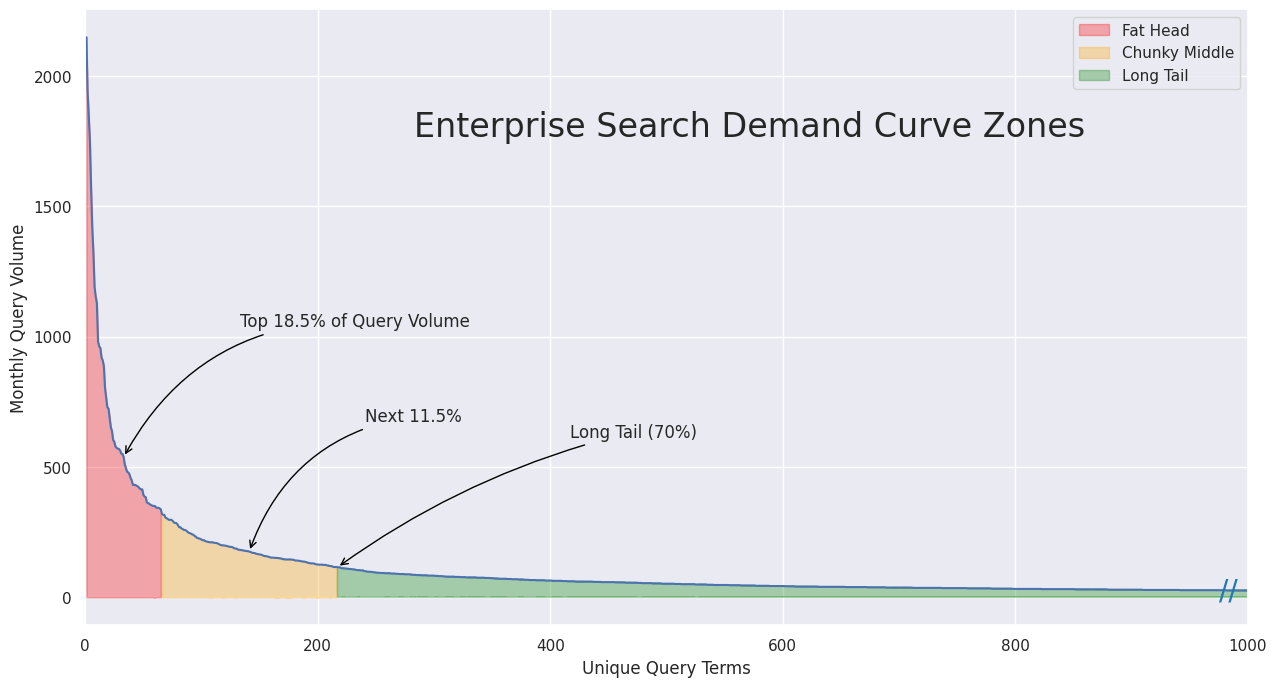

In [37]:
# Many thanks to Muhammed Harris for assistance with matplotlib styling in the stanza below.

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

es_df_sorted = es_df.sort_values(by='volume', ascending=False)
es_df_sorted['cumulative_volume'] = es_df_sorted['volume'].cumsum()
es_df_sorted['cumulative_percentage'] = (es_df_sorted['volume'] / es_df_sorted['cumulative_volume'].max()).cumsum()

# zone percentiles, use kritzinger2013 SEO cutoffs.
fat_head_cutoff=0.185
chunky_middle_cutoff=0.30

#we can modify percentiles here
fat_head = es_df_sorted[es_df_sorted['cumulative_percentage'] <= fat_head_cutoff]
chunky_middle = es_df_sorted[(es_df_sorted['cumulative_percentage'] > fat_head_cutoff) & (es_df_sorted['cumulative_percentage'] <= chunky_middle_cutoff)]
long_tail = es_df_sorted[es_df_sorted['cumulative_percentage'] > chunky_middle_cutoff]

sns.set(rc={'figure.figsize':(15, 8)})

ax = sns.lineplot(y='volume', x='counter', data=es_df)

ax.fill_between(fat_head['counter'], fat_head['volume'], color='red', alpha=0.3, label='Fat Head')
ax.fill_between(chunky_middle['counter'], chunky_middle['volume'], color='orange', alpha=0.3, label='Chunky Middle')
ax.fill_between(long_tail['counter'], long_tail['volume'], color='green', alpha=0.3, label='Long Tail')

ax.set_xlabel("Unique Query Terms")
ax.set_ylabel("Monthly Query Volume")
#ax.set_title("Search Demand Curve for Enterprise Search", fontsize=14, weight='bold')
ax.text(0.5, 0.7, 'Enterprise Search Demand Curve Zones', transform=fig.transFigure, fontsize=24, ha='center', va='center')


ax.annotate('Top 18.5% of Query Volume', xy=(fat_head['counter'].median(), fat_head['volume'].median()),
            xytext=(fat_head['counter'].median() + 100, fat_head['volume'].median() + 500),
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=0.3", linewidth=1, color='black'))

ax.annotate('Next 11.5%', xy=(chunky_middle['counter'].median(), chunky_middle['volume'].median()),
            xytext=(chunky_middle['counter'].median() + 100, chunky_middle['volume'].median() + 500),
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=0.3", linewidth=1, color='black'))

ax.annotate('Long Tail (70%)', xy=(long_tail.iloc[0]['counter'], long_tail.iloc[0]['volume']),
            xytext=(long_tail.iloc[0]['counter'] + 200, long_tail.iloc[0]['volume'] + 500),
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=0.1", linewidth=1, color='black'))



#limit display of x-axis to make plot more readable, does not affect figures or percentiles.
ax.set_xlim(left=0.0,right=1000)



a = fat_head.queries.count()
#txt="Fig: Search Demand Curve generated from ES query history.  Just' %(a)"

#plt.figtext(0.5, 0.00, 'Fig: Search Demand Curve generated from ES query history.  The %a most frequently submitted queries account for the 18.5 percent of Search Volume'%a, wrap=True, horizontalalignment='center', fontsize=12)

#squiggle code
x_lim = ax.get_xlim()
x_pos_squiggle = x_lim[1]
y_pos_squiggle_es_df = es_df[es_df['counter'] <= x_pos_squiggle]['volume'].iloc[-1]
ax.text(x_pos_squiggle-25, y_pos_squiggle_es_df-55, '//', fontsize=20, ha='left', va='bottom', color='tab:blue')
#end squiggle code


plt.legend()
plt.savefig('Fig-Search-Demand-Curve-ES.png', bbox_inches='tight')   

plt.show()



**In the above plot, we see that there are just 65 unique query terms accounting for the top 18.5% of all query volume.**

# **Verification** <a class="anchor"  id="Verification"></a>
The following (debug) section just verifies that the number of search terms and the volume under the plotted curve match the figures from the dataframe.   Th Python caluclations are double-checked by 'awk' linux shell command.

In [38]:
es_df_sorted.tail(3)

,queries,volume,counter,word_count,cumulative_volume,cumulative_percentage
36462,ordinary degrees,1,36463,2,242665,0.999992
36463,ordinary ba application,1,36464,3,242666,0.999996
62043,-,1,62044,1,242667,1.000000


In [39]:
total_volume=es_df_sorted.at[es_df_sorted['counter'].iloc[-1]-1,'cumulative_volume']   
print ("The total volume of searches is:",total_volume)

# AWK double-check the "total volume of queries" using linux shell commmands ('the old way'): -
!cat /kaggle/input/es-query-history/es-query-history-v25.txt | awk ' {sum += $NF} END {print sum}'

The total volume of searches is: 242667
242667


In [40]:
total_queries=es_df_sorted.at[es_df_sorted['counter'].iloc[-1]-1,'counter']-1
print ("The total number of submitted searches is:",total_queries)

# AWK command to get cumulative figure for top 100 queries, note pandas counter starts at zero
!wc -l /kaggle/input/es-query-history/es-query-history-v25.txt  


The total number of submitted searches is: 62043
62044 /kaggle/input/es-query-history/es-query-history-v25.txt


In [41]:
COUNTS = [15, 50, 65, 100, 216, 500, 700,total_queries]   #500 is a number often quoted by Google Web Search, included here for comparision
for COUNT in COUNTS:
    volume_at_row_COUNT=es_df_sorted.at[COUNT,'cumulative_volume']
    percentage_volume_COUNT=(volume_at_row_COUNT/total_volume)
    print ("The volume after #",COUNT,"submitted queries is",volume_at_row_COUNT,"which accounts for","{:.2f}".format(percentage_volume_COUNT*100),"percent of the total volume")
    

The volume after # 15 submitted queries is 21090 which accounts for 8.69 percent of the total volume
The volume after # 50 submitted queries is 39712 which accounts for 16.36 percent of the total volume
The volume after # 65 submitted queries is 44967 which accounts for 18.53 percent of the total volume
The volume after # 100 submitted queries is 54218 which accounts for 22.34 percent of the total volume
The volume after # 216 submitted queries is 72834 which accounts for 30.01 percent of the total volume
The volume after # 500 submitted queries is 93517 which accounts for 38.54 percent of the total volume
The volume after # 700 submitted queries is 102116 which accounts for 42.08 percent of the total volume
The volume after # 62043 submitted queries is 242667 which accounts for 100.00 percent of the total volume


**For Google, the top 500 most popular search terms make up 8.4% of all search volume.   In our ES dataset, the top 500 most popular search terms make up 38.5 % of all search volume.**

In [42]:
#same as above, but expressing y as the dependent variable

TOPS=[10,15,20,50,65,100,216,500,(total_queries)]

for TOP in TOPS:
    top_TOP = es_df_sorted.at[TOP,'cumulative_percentage']
    print (TOP,"queries account for " "{:.2f}".format(top_TOP*100),"% of all Query Volume")

10 queries account for 6.78 % of all Query Volume
15 queries account for 8.69 % of all Query Volume
20 queries account for 10.22 % of all Query Volume
50 queries account for 16.36 % of all Query Volume
65 queries account for 18.53 % of all Query Volume
100 queries account for 22.34 % of all Query Volume
216 queries account for 30.01 % of all Query Volume
500 queries account for 38.54 % of all Query Volume
62043 queries account for 100.00 % of all Query Volume


In [43]:
#check that all queries together amount to 100% volume
END_ROW_VOLUME_PERCENT = print(100*es_df_sorted.at[total_queries,'cumulative_percentage'])    # for validation, total volume at last row should be 100%

100.00000000011457


In [44]:
# AWK command to get cumulative figure for top 100 queries
!head -101 /kaggle/input/es-query-history/es-query-history-v25.txt | awk '{sum+=$NF} END {print sum}'

# pandas command should match above e.g. 53009
Y=es_df_sorted.at[100,'cumulative_volume']; print (Y)

54218
54218


In [45]:
print ("Top 18.5% of search queries is",fat_head.queries.count(), "queries.")
print ("Middle 11.5% of search volume uses",chunky_middle.queries.count(), "queries.")
print ("First 30% of search volume uses",fat_head.queries.count()+chunky_middle.queries.count(), "queries.")
print ("Last 70% of search volume uses", long_tail.queries.count(), "queries.")


Top 18.5% of search queries is 65 queries.
Middle 11.5% of search volume uses 151 queries.
First 30% of search volume uses 216 queries.
Last 70% of search volume uses 61828 queries.


In [46]:
# simply list all queries belonging to each section
for SECTION in fat_head,chunky_middle,long_tail:
    SECTION_COUNTER=SECTION.shape[0]
    print (SECTION_COUNTER) # get number of queries in each SECTION of search demand curve
    #print (SECTION['queries'].to_string(index=False).ljust(0))  # exclude index counter , index=False
# head -${SECTION_COUNTER} ../completions/es-query-history-v25.txt

65
151
61828


 # **References** <a class="anchor"  id="Introduction"></a>

N. Craswell, M. Cambridge, and I. Soboroff, “Overview of the TREC-2005 Enterprise
Track,” in TREC 2005 conference notebook, 2005, pp. 199–205. 

U. Kruschwitz and C. Hull, “Searching the Enterprise,” Foundations and Trends® in Information Retrieval, vol. 11, no. 1,pp. 1–142, 2017.

W. T. Kritzinger and M. Weideman, “Search Engine Optimization and Pay-per-Click
Marketing Strategies,” Journal of Organizational Computing and Electronic Commerce, vol. 23, no. 3, pp. 273–286, 2013.


# **Todo:**  <a class="anchor"  id="Todo">
